In [1]:
!pip install -U statsmodels

     |████████████████████████████████| 9.8 MB 26.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [3]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

--2022-01-06 06:06:18--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2036 (2.0K) [text/csv]
Saving to: ‘airline_passengers.csv’

airline_passengers. 100%[===================>]   1.99K  --.-KB/s    in 0s      

2022-01-06 06:06:19 (41.1 MB/s) - ‘airline_passengers.csv’ saved [2036/2036]



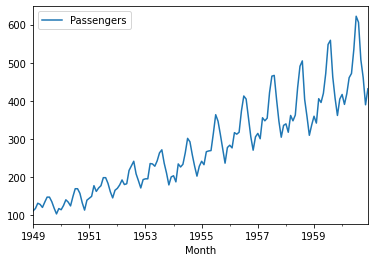

In [4]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)
df.plot();

### Stationarity

Stationarity means that the distribution of the data does not change overtime (mean and variance will always be the same).

Example: if a time series is trending upwards or downwards = value of mean is changing. Existence of any trend means that the time series is not stationary.

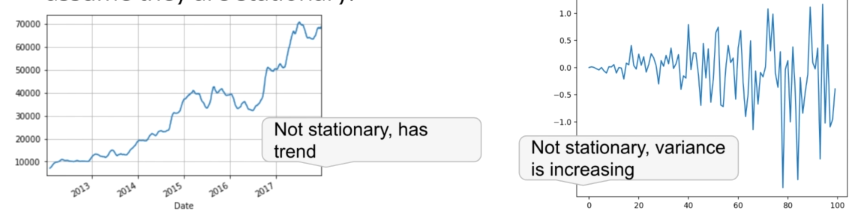

In [5]:
# 1st value = adf = test statistic
# 2nd value = pvalue = MacKinnon’s approximate p-value based on MacKinnon
# determine whether it's stationary (< 0.05) or not

adfuller(df['Passengers'])

(0.8153688792060418,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 996.692930839019)

In [7]:
# Function to determine whether data is stationary (pvalue < 5%) or not

def adf(x):
  res = adfuller(x)
  print("Test-Statistic:", res[0])
  print("P-Values:", res[1])
  if res[1] < 0.05:
    print("Stationary")
  else:
    print("Non-Stationary")

In [8]:
adf(df['Passengers'])

Test-Statistic: 0.8153688792060418
P-Values: 0.9918802434376409
Non-Stationary


In [9]:
# Test function on stationary signal

adf(np.random.randn(100))

Test-Statistic: -5.16905158533772
P-Values: 1.0165510676257683e-05
Stationary


In [10]:
# Test function on gamma distributed signal

adf(np.random.gamma(1, 1, 100))

Test-Statistic: -4.526394907045948
P-Values: 0.00017613713030685207
Stationary


In [11]:
df['LogPassengers'] = np.log(df['Passengers'])

In [12]:
adf(df['LogPassengers'])

Test-Statistic: -1.7170170891069612
P-Values: 0.4223667747703909
Non-Stationary


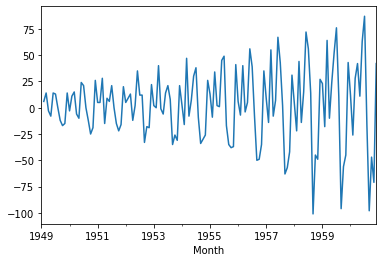

In [13]:
# The variance of the signal increase over time

df['Diff'] = df['Passengers'].diff()
df['Diff'].plot();

In [14]:
adf(df['Diff'].dropna()) 

Test-Statistic: -2.829266824169997
P-Values: 0.05421329028382577
Non-Stationary


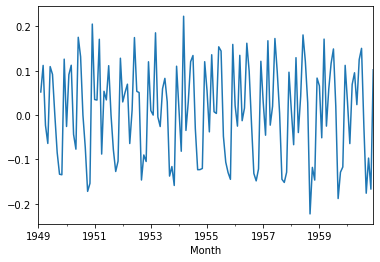

In [15]:
df['DiffLog'] = df['LogPassengers'].diff()
df['DiffLog'].plot();

In [16]:
adf(df['DiffLog'].dropna()) 

Test-Statistic: -2.7171305983881044
P-Values: 0.07112054815086355
Non-Stationary


In [17]:
# Try stock prices

!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

--2022-01-06 06:24:09--  https://lazyprogrammer.me/course_files/sp500sub.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25473876 (24M) [text/csv]
Saving to: ‘sp500sub.csv’

sp500sub.csv        100%[===================>]  24.29M  14.6MB/s    in 1.7s    

2022-01-06 06:24:11 (14.6 MB/s) - ‘sp500sub.csv’ saved [25473876/25473876]



In [18]:
stocks = pd.read_csv('sp500sub.csv', index_col='Date', parse_dates=True)
stocks.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [19]:
# Google stock

goog = stocks[stocks['Name'] == 'GOOG'][['Close']]

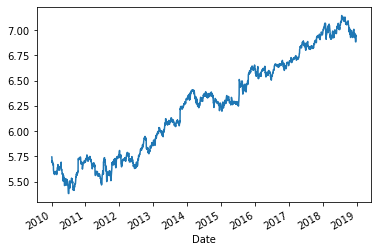

In [24]:
goog['LogPrice'] = np.log(goog['Close'])
goog['LogPrice'].plot();

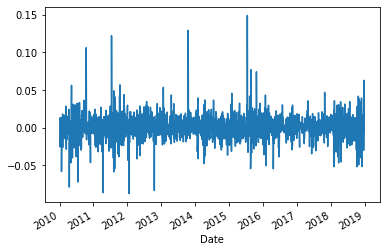

In [25]:
goog['LogRet'] = goog['LogPrice'].diff()
goog['LogRet'].plot();

In [26]:
adf(goog['LogPrice'])

Test-Statistic: -0.4181902578906136
P-Values: 0.9070170677498408
Non-Stationary


In [27]:
adf(goog['LogRet'].dropna())

Test-Statistic: -46.667480227736796
P-Values: 0.0
Stationary


In [28]:
# Try Starbucks stock

sbux = stocks[stocks['Name'] == 'SBUX'][['Close']]
sbux['LogPrice'] = np.log(sbux['Close'])
sbux['LogRet'] = sbux['LogPrice'].diff()

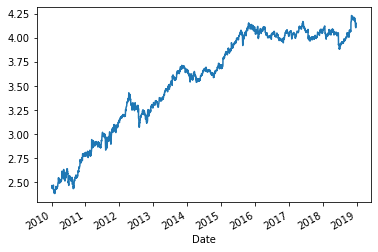

In [29]:
sbux['LogPrice'].plot();

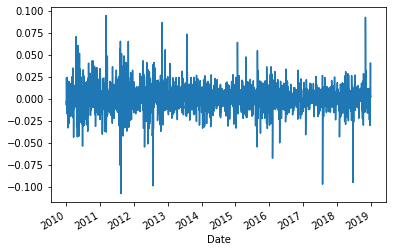

In [30]:
sbux['LogRet'].plot();

In [31]:
adf(sbux['LogPrice'])

Test-Statistic: -1.9020133583900012
P-Values: 0.3311145569853755
Non-Stationary


In [32]:
adf(sbux['LogRet'].dropna())

Test-Statistic: -30.086501426958073
P-Values: 0.0
Stationary
